In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [2]:
# Load dataset
df=pd.read_csv("/content/data.csv")

In [3]:
# Handle missing values
df = df.dropna()

In [4]:
# Define features and target variable
X = df[['WaistCirc', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides']]
y = df['MetabolicSyndrome']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [35]:
# Ensure directory exists
os.makedirs('C:\Metabolic Syndrome project\models', exist_ok=True)

# Save model
with open('C:\Metabolic Syndrome project\random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save scaler
with open('C:\Metabolic Syndrome project\scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Return evaluation metrics and confusion matrix
accuracy, classification_rep, conf_matrix

(0.8374792703150912,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.87      0.87       387\n           1       0.77      0.78      0.77       216\n\n    accuracy                           0.84       603\n   macro avg       0.82      0.82      0.82       603\nweighted avg       0.84      0.84      0.84       603\n',
 array([[337,  50],
        [ 48, 168]]))

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [37]:
# Models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [39]:
# Train and evaluate ML models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = (accuracy, classification_rep, conf_matrix)

    # Save the trained model
    os.makedirs("D:/March-2025/project/own/msd/models", exist_ok=True)
    with open(f"D:/March-2025/project/own/msd/models/{name.replace(' ', '_')}.pkl", 'wb') as model_file:
        pickle.dump(model, model_file)


<ipython-input-40-4baeb7ea2c49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MetabolicSyndrome', palette='pastel')


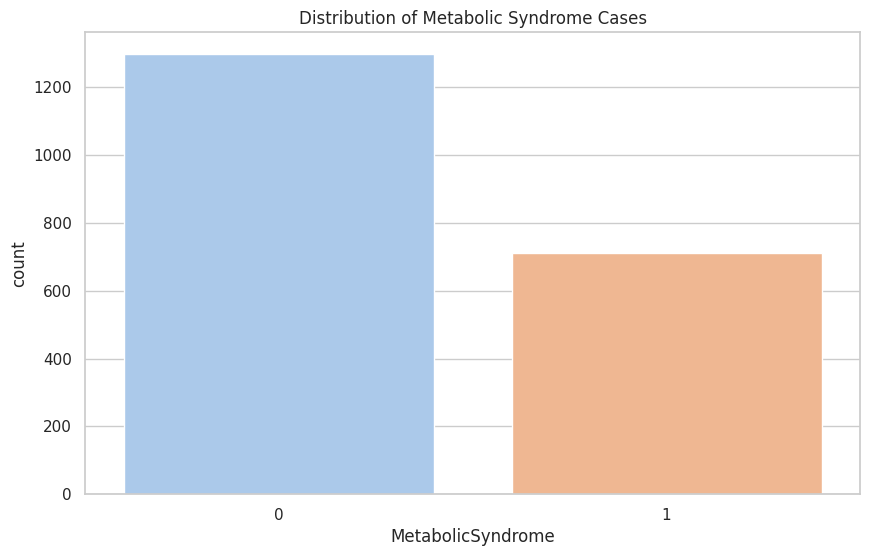

<ipython-input-40-4baeb7ea2c49>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MetabolicSyndrome', y='Age', palette='coolwarm')


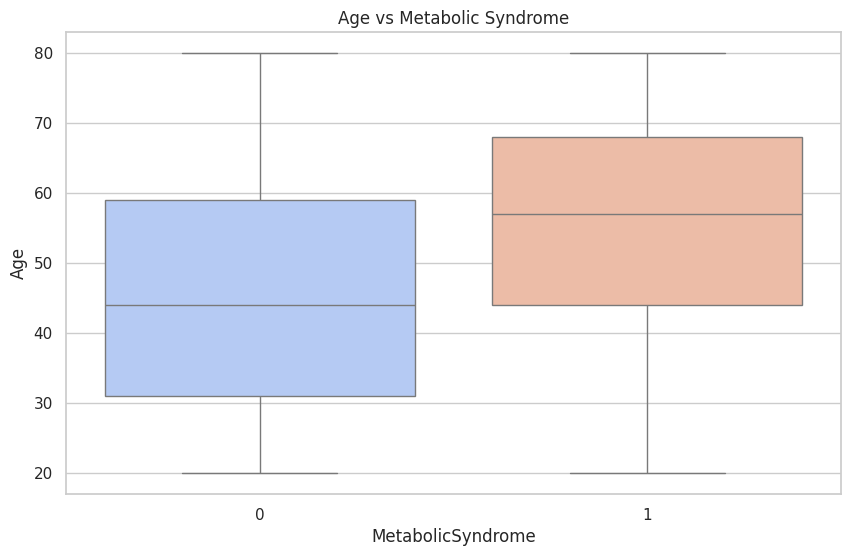

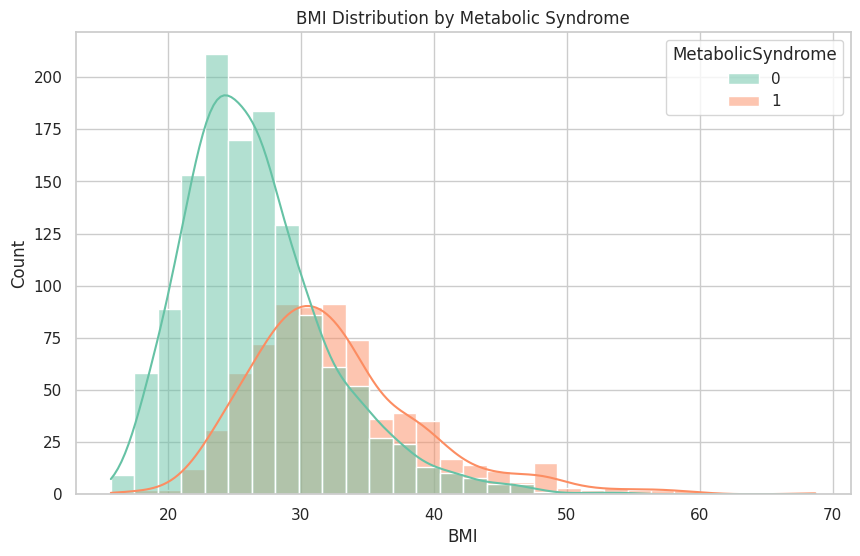

In [40]:
# --- Visual Analysis --- #
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MetabolicSyndrome', palette='pastel')
plt.title("Distribution of Metabolic Syndrome Cases")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MetabolicSyndrome', y='Age', palette='coolwarm')
plt.title("Age vs Metabolic Syndrome")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='MetabolicSyndrome', bins=30, kde=True, palette='Set2')
plt.title("BMI Distribution by Metabolic Syndrome")
plt.show()

<ipython-input-41-17db9ffe1591>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='MetabolicSyndrome', y='WaistCirc', palette='mako')


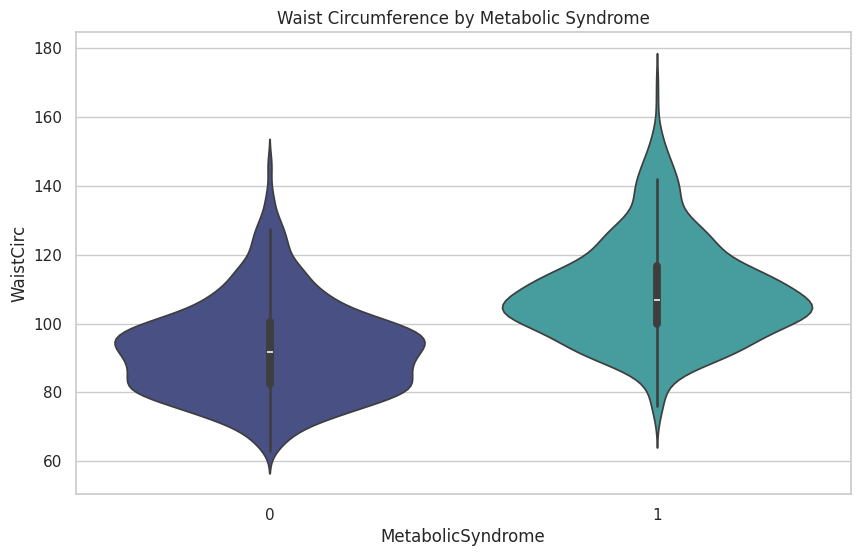

<ipython-input-41-17db9ffe1591>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='MetabolicSyndrome', y='BloodGlucose', palette='rocket')


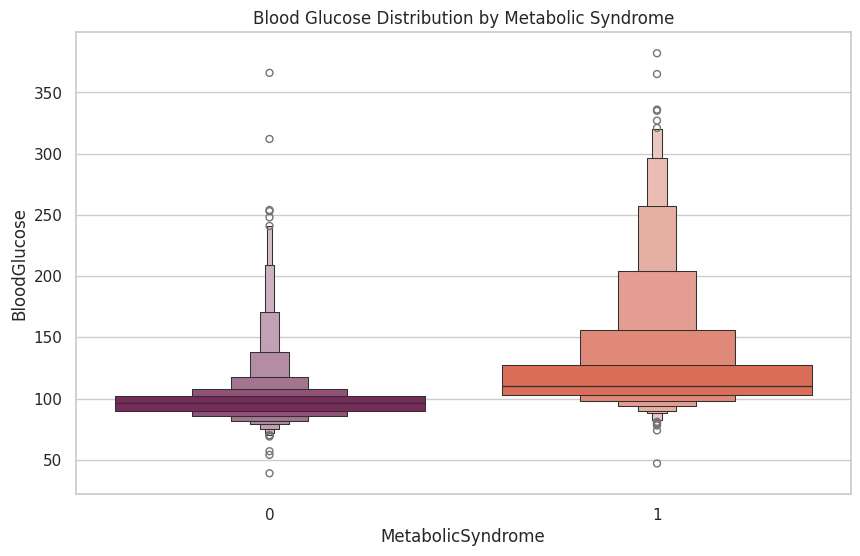

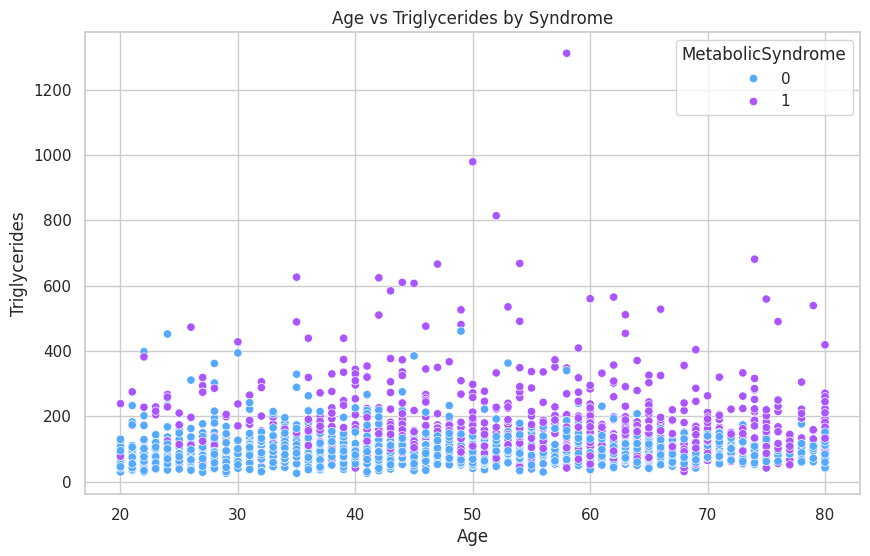

In [41]:
# Additional Visualizations
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='MetabolicSyndrome', y='WaistCirc', palette='mako')
plt.title("Waist Circumference by Metabolic Syndrome")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='MetabolicSyndrome', y='BloodGlucose', palette='rocket')
plt.title("Blood Glucose Distribution by Metabolic Syndrome")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Triglycerides', hue='MetabolicSyndrome', palette='cool')
plt.title("Age vs Triglycerides by Syndrome")
plt.show()


<ipython-input-42-1263264f5f8c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


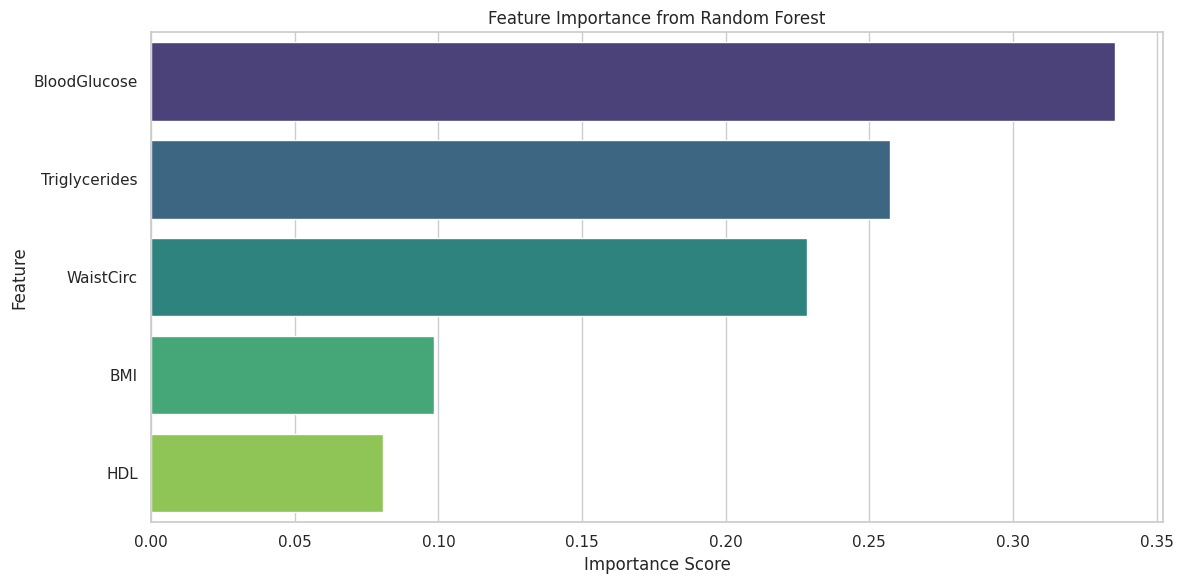

In [42]:
# --- Feature Importance --- #
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [43]:
# LSTM Model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6954 - loss: 0.6020 - val_accuracy: 0.7430 - val_loss: 0.5107
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7364 - loss: 0.4895 - val_accuracy: 0.7479 - val_loss: 0.5107
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7573 - loss: 0.4812 - val_accuracy: 0.7529 - val_loss: 0.5096
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7576 - loss: 0.4894 - val_accuracy: 0.7347 - val_loss: 0.5107
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7909 - loss: 0.4614 - val_accuracy: 0.7313 - val_loss: 0.5114
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7518 - loss: 0.4966 - val_accuracy: 0.7463 - val_loss: 0.5057
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7728 - loss: 0.4520 - val_accuracy: 0.7446 - val_loss: 0.5167
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7662 - loss: 0.4710 - val_accuracy: 0.7496 - val_loss: 0.5055
Ep

In [44]:
# Evaluate LSTM
lstm_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
lstm_accuracy = accuracy_score(y_test, lstm_pred)
lstm_classification_report = classification_report(y_test, lstm_pred)
lstm_conf_matrix = confusion_matrix(y_test, lstm_pred)

results["LSTM Model"] = (lstm_accuracy, lstm_classification_report, lstm_conf_matrix)

# Save LSTM model
lstm_model.save("D:/March-2025/project/own/msd/models/lstm_model.h5")

# Save scaler
with open("D:/March-2025/project/own/msd/models/scaler.pkl", 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Print results
for model_name, (acc, report, cm) in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print("-" * 50)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


Model: Random Forest
Accuracy: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       387
           1       0.77      0.78      0.77       216

    accuracy                           0.84       603
   macro avg       0.82      0.82      0.82       603
weighted avg       0.84      0.84      0.84       603

Confusion Matrix:
 [[337  50]
 [ 48 168]]
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.7944
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       387
           1       0.74      0.65      0.69       216

    accuracy                           0.79       603
   macro avg       0.78      0.76      0.77       603
weighted avg       0.79      0.79      0.79       603

Confusion Matrix:
 [[339  48]
 [ 76 140]]
--------------------------------------------------
Model: Support Vector Machine


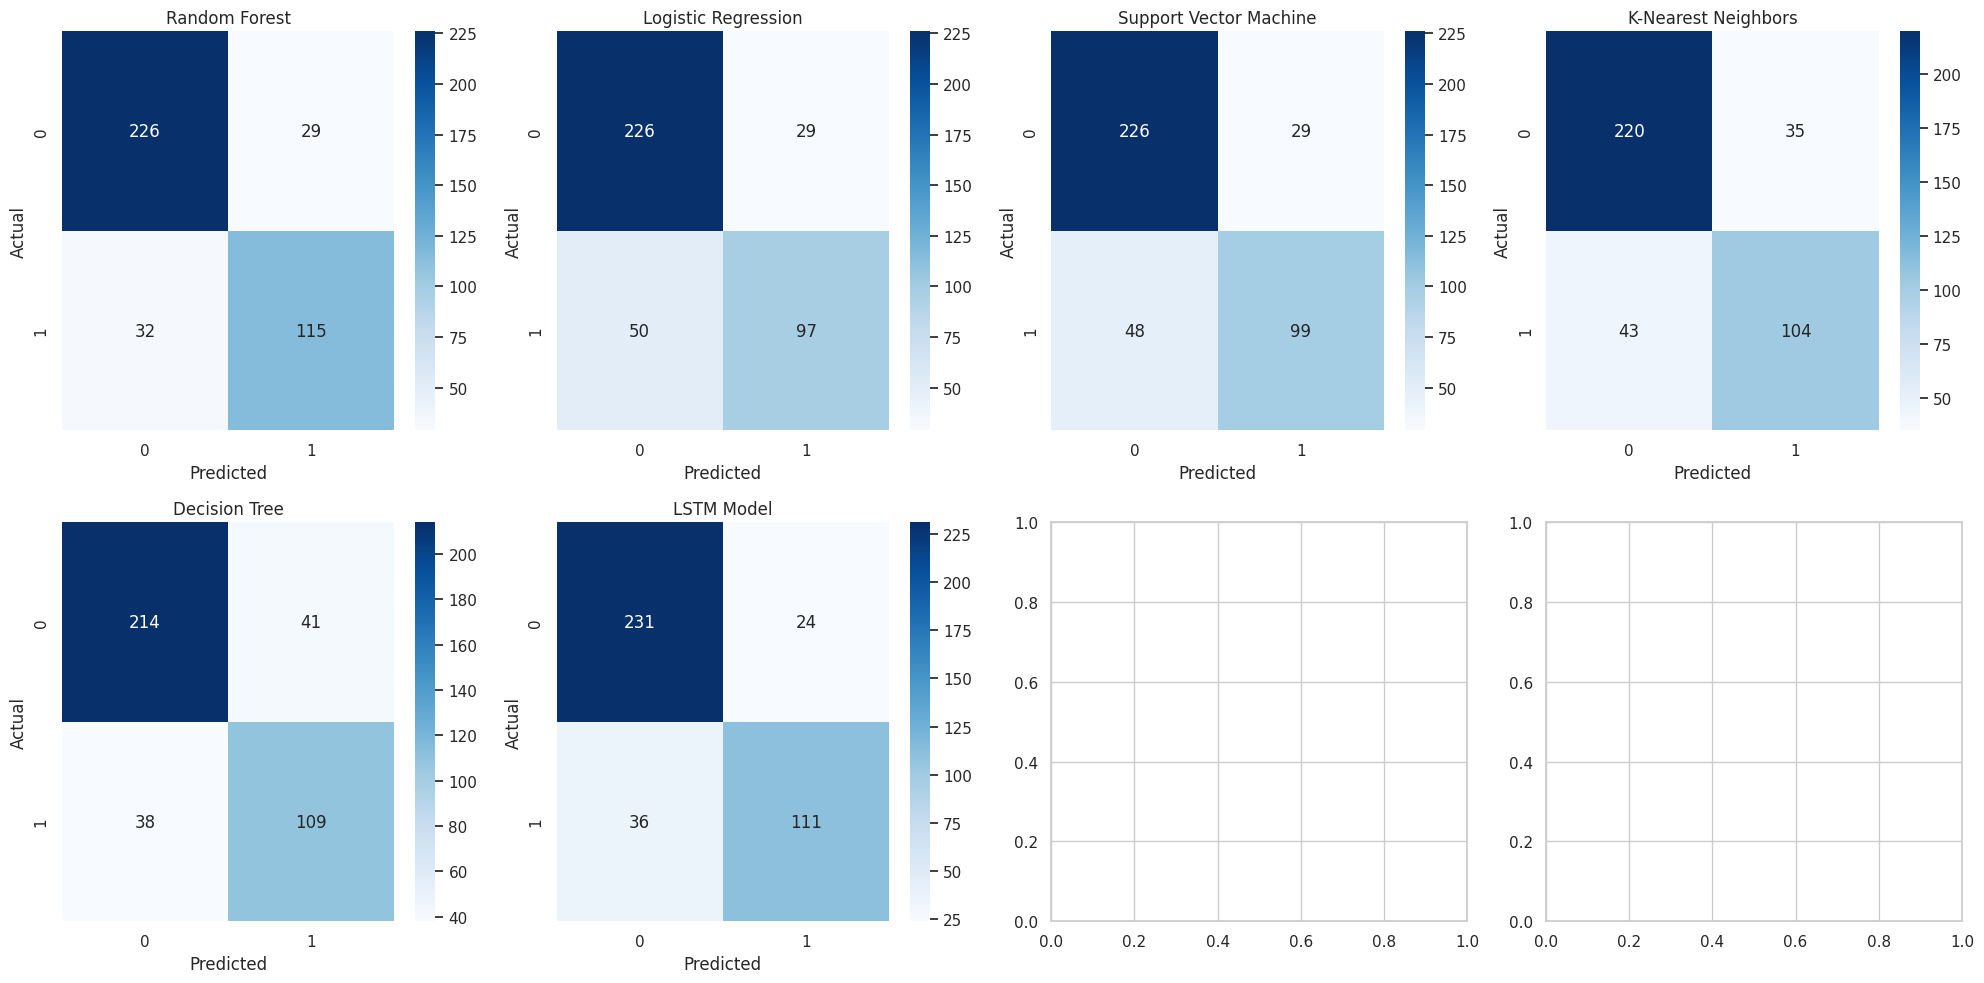

In [27]:
# Visualize confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, (model_name, (_, _, cm)) in enumerate(results.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()
